# Data analysis
In this section, we are going to implement and discuss the different data preprocessing algorithms.

This section has the following algorithms:
- PCA
- MDS
- ISOMAP

In [146]:
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import numpy as np

import time

FIG_SIZE = (10, 6)

# Load data
lfw_people = fetch_lfw_people(min_faces_per_person=53, resize=.4)
X, y = lfw_people.images, lfw_people.target
print(f"Number of classes: {len(np.unique(y))}")
X.shape, y.shape

Number of classes: 10


((1456, 50, 37), (1456,))

In [130]:
TRAIN_SIZE = 0.7
RANDOM_STATE = 42

# Codificamos las etiquetas
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

# Dividimos los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

print(f"x_train shape: {x_train.shape}")
print(f" x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f" y_test shape: {y_test.shape}")

x_train shape: (1019, 50, 37)
 x_test shape: (437, 50, 37)
y_train shape: (1019,)
 y_test shape: (437,)


## PCA
**Principal Component Analysis**

Method used to simplify data reducing the number of details but keeping those most important.

First, we adjust each variable to be equally comparable. 

Then, we find relationships between this kinds of data and highlight those that are more important; important here is defined as the components that represent the most significant patterns in the data. 

Finally, we focus in the principal components and reduce the data sample based in those.

In [131]:
METHOD = PCA(n_components=2)

start_time = time.time()
x_train_reduced = METHOD.fit_transform(x_train.reshape(x_train.shape[0], -1))
x_test_reduced = METHOD.transform(x_test.reshape(x_test.shape[0], -1))
total_time = time.time() - start_time
PCA_REDUCED = ( x_train_reduced.copy(), x_test_reduced.copy(), "PCA" )

print(f"Total time elapsed: {total_time}")
print("")
print(f"Shapes:")
print(f"\tx_train:         {x_train.shape}")
print(f"\tx_train_reduced: {x_train_reduced.shape}")

Total time elapsed: 0.25031447410583496

Shapes:
	x_train:         (1019, 50, 37)
	x_train_reduced: (1019, 2)


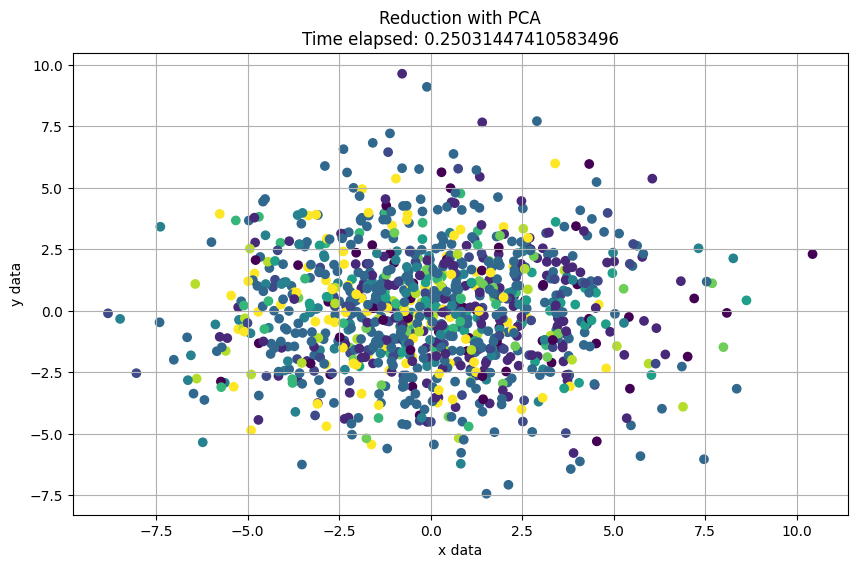

In [132]:
plt.figure(figsize=FIG_SIZE)
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train, cmap='viridis', label="PCA")
plt.title(f"Reduction with PCA\nTime elapsed: {total_time}")
plt.xlabel("x data")
plt.ylabel("y data")
plt.grid(True)
plt.show()

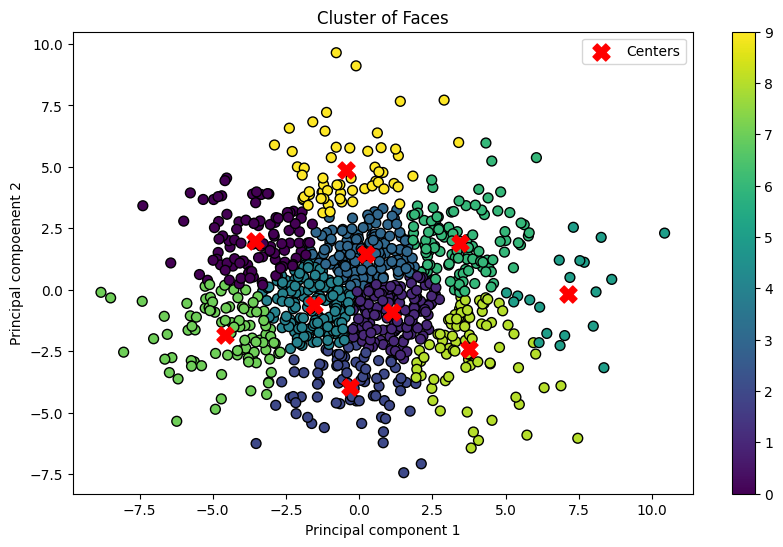

In [133]:
# Number of clusters
N_CLUSTERS = 10
RANDOM_STATE = 42

kmeans = KMeans(n_clusters=10, random_state=RANDOM_STATE)
kmeans.fit(x_train_reduced)
clusters = kmeans.predict(x_train_reduced)

PCA_CLUSTERS = (clusters.copy(), kmeans.cluster_centers_.copy())

plt.figure(figsize=FIG_SIZE)
scatter = plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=clusters, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=150, marker='X', label='Centers')
plt.title('Cluster of Faces')
plt.xlabel('Principal component 1')
plt.ylabel('Principal compoenent 2')
plt.colorbar(scatter)
plt.legend(loc='best')
plt.show()

### Analysis
This clusters appear to be overlapping but display moderate separation. There is a reasonable distribution of points, suggesting that PCA has achieved to capture the most significant components.

The cluster centers seem reasonably well-placed though some cluster centers are closer to the edges of their respective cluster.

## MDS
**Multi Dimensional Scaling**

Helps visualize how similar or different objects are from each other.

First, gather information about how distant each object is from every other.

Then, draw that distance in a map preserving the real distances as much as possible. This process is repeated to adjust the positions.

Finally, the final output is the resulting map after this adjustments.

In [134]:
METHOD = MDS(n_components=2)

start_time = time.time()
x_train_reduced = METHOD.fit_transform( x_train.reshape(x_train.shape[0], -1) )
x_test_reduced = METHOD.fit_transform( x_test.reshape(x_test.shape[0], -1) )
total_time = time.time() - start_time
MDS_REDUCED = ( x_train_reduced.copy(), x_test_reduced.copy(), "MDS" )

print(f"Total time elapsed: {total_time}")
print("")
print(f"Shapes:")
print(f"\tx_train:         {x_train.shape}")
print(f"\tx_train_reduced: {x_train_reduced.shape}")

Total time elapsed: 180.59163069725037

Shapes:
	x_train:         (1019, 50, 37)
	x_train_reduced: (1019, 2)


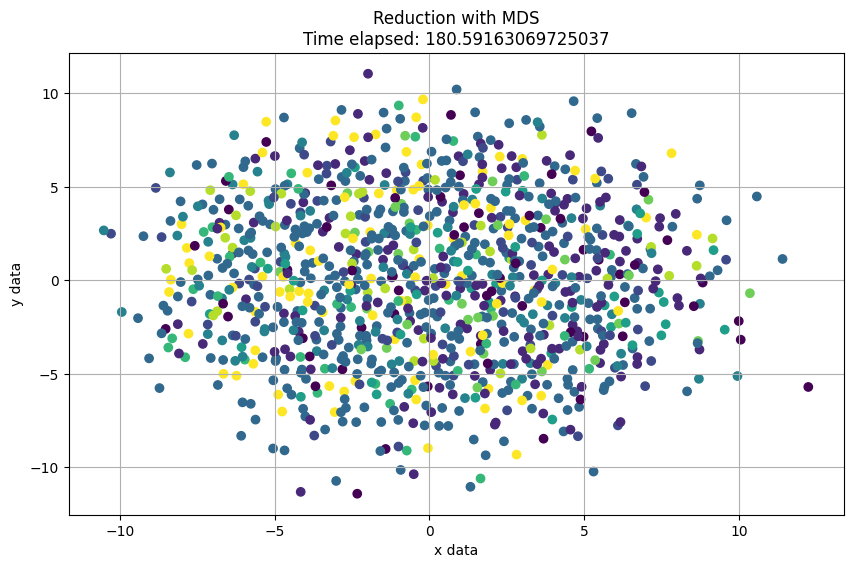

In [135]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train, cmap='viridis')
plt.title(f"Reduction with MDS\nTime elapsed: {total_time}")
plt.xlabel("x data")
plt.ylabel("y data")
plt.grid(True)
plt.show()

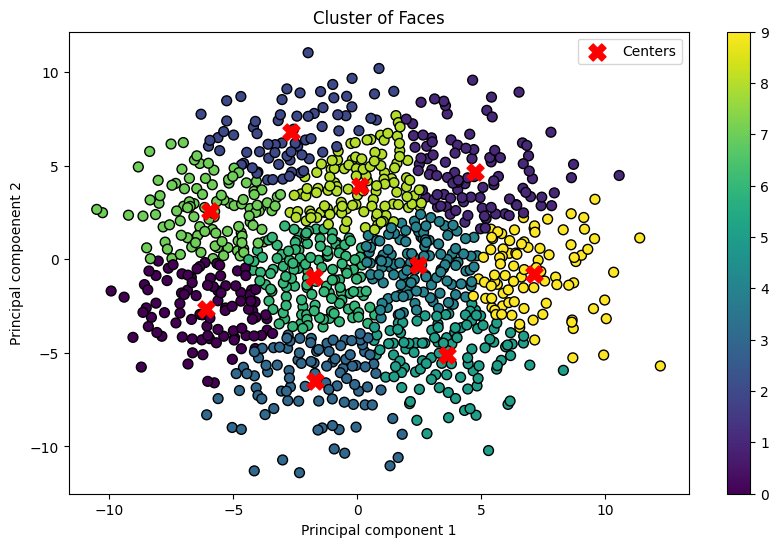

In [136]:
# Number of clusters
N_CLUSTERS = 10
RANDOM_STATE = 42

kmeans = KMeans(n_clusters=10, random_state=RANDOM_STATE)
kmeans.fit(x_train_reduced)
clusters = kmeans.predict(x_train_reduced)
MDS_CLUSTERS = (clusters.copy(), kmeans.cluster_centers_.copy())

plt.figure(figsize=FIG_SIZE)
scatter = plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=clusters, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=150, marker='X', label='Centers')
plt.title('Cluster of Faces')
plt.xlabel('Principal component 1')
plt.ylabel('Principal compoenent 2')
plt.colorbar(scatter)
plt.legend(loc='best')
plt.show()

### Analysis 
Clusters here are slightly more compact than in PCA, with better-defined boundaries between some of the clusters. The points are spread out more uniformly, which might indicate better handling of the intrinsic distances between data points.

Cluster centers are more centrally located within their clusters compared to PCA, suggesting a better alignment of centroids with the data points.

## ISOMAP

**Isometric Mapping**

Method used to simplify complex data while preserving th erelationships between points. Works similarly as the MDS but focus in maintaining the geodesic distance imposed by a weighted graph.

### Steps:
- Determine the neighbors of each point.
- Construct a neighbor graph
- Compute shortest path, using Dijkstra or Floyd-Warshall
- Applies a dimension reduction

In [137]:
METHOD = Isomap(n_components=2)

start_time = time.time()
x_train_reduced = METHOD.fit_transform( x_train.reshape(x_train.shape[0], -1) )
x_test_reduced = METHOD.transform( x_test.reshape(x_test.shape[0], -1) )
total_time = time.time() - start_time
ISOMAP_REDUCED = ( x_train_reduced.copy(), x_test_reduced.copy(), "ISOMAP" )

print(f"Total time elapsed: {total_time}")
print("")
print(f"Shapes:")
print(f"\tx_train:         {x_train.shape}")
print(f"\tx_train_reduced: {x_train_reduced.shape}")

Total time elapsed: 2.7961084842681885

Shapes:
	x_train:         (1019, 50, 37)
	x_train_reduced: (1019, 2)


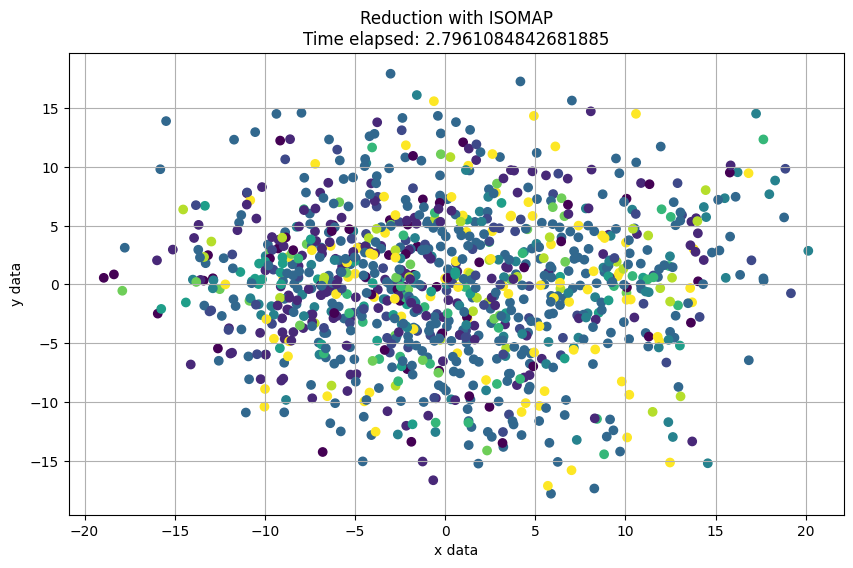

In [138]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train, cmap='viridis')
plt.title(f"Reduction with ISOMAP\nTime elapsed: {total_time}")
plt.xlabel("x data")
plt.ylabel("y data")
plt.grid(True)
plt.show()

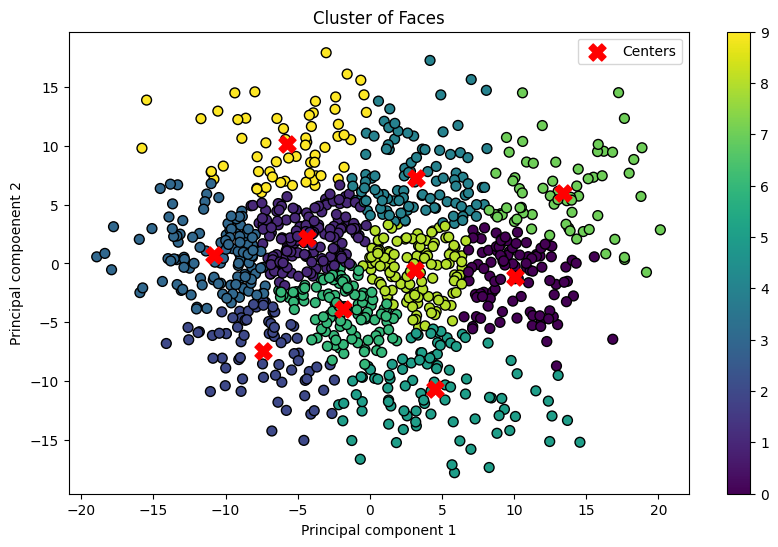

In [139]:
# Number of clusters
N_CLUSTERS = 10
RANDOM_STATE = 42

kmeans = KMeans(n_clusters=10, random_state=RANDOM_STATE)
kmeans.fit(x_train_reduced)
clusters = kmeans.predict(x_train_reduced)
ISOMAP_CLUSTERS = (clusters.copy(), kmeans.cluster_centers_.copy())

plt.figure(figsize=FIG_SIZE)
scatter = plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=clusters, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=150, marker='X', label='Centers')
plt.title('Cluster of Faces')
plt.xlabel('Principal component 1')
plt.ylabel('Principal compoenent 2')
plt.colorbar(scatter)
plt.legend(loc='best')
plt.show()

### Analysis
This plot shows good separation between clusters with distinct groupings. There is clear space between most clusters, indicating effective capturing of the manifold’s geometry.

Cluster centers are generally well-positioned within the dense regions of the clusters, although a few clusters near the edges have centers that could potentially be better aligned.

## LLE

**Locally Linear Embedding**

This method is useful when the data has non-linear structures, as this algorithm is good at unfolding them into simpler flat maps without distorting the local relationships between points.

In [140]:
METHOD = LocallyLinearEmbedding(n_components=2)

start_time = time.time()
x_train_reduced = METHOD.fit_transform( x_train.reshape(x_train.shape[0], -1) )
x_test_reduced = METHOD.transform( x_test.reshape(x_test.shape[0], -1) )
total_time = time.time() - start_time
LLE_REDUCED = ( x_train_reduced.copy(), x_test_reduced.copy(), "LLE" )

print(f"Total time elapsed: {total_time}")
print("")
print(f"Shapes:")
print(f"\tx_train:         {x_train.shape}")
print(f"\tx_train_reduced: {x_train_reduced.shape}")

Total time elapsed: 1.9814696311950684

Shapes:
	x_train:         (1019, 50, 37)
	x_train_reduced: (1019, 2)


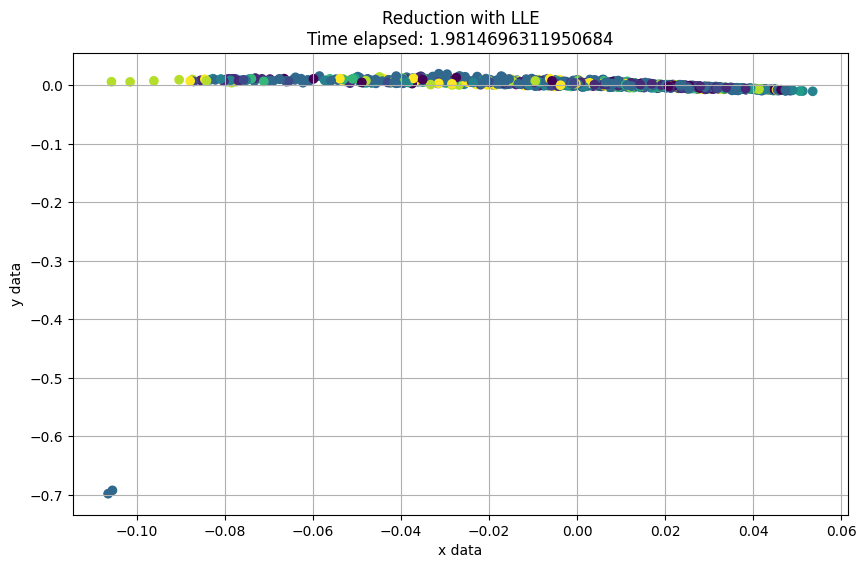

In [141]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=y_train, cmap='viridis')
plt.title(f"Reduction with LLE\nTime elapsed: {total_time}")
plt.xlabel("x data")
plt.ylabel("y data")
plt.grid(True)
plt.show()

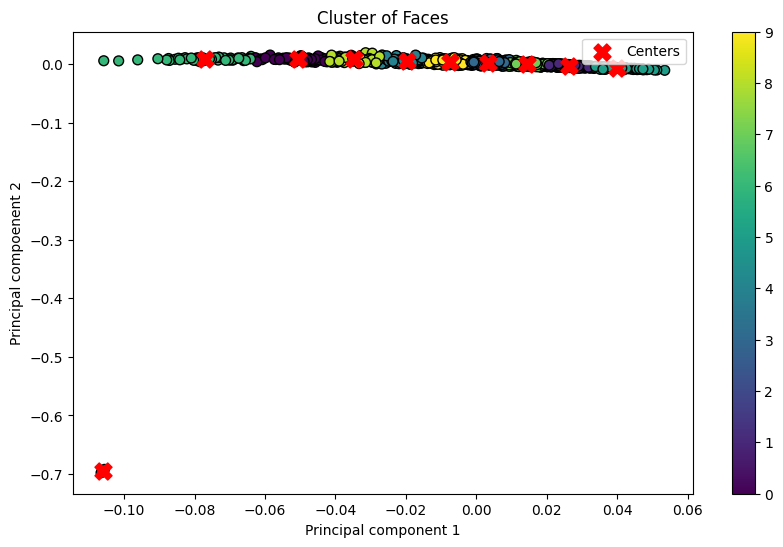

In [142]:
# Number of clusters
N_CLUSTERS = 10
RANDOM_STATE = 42

kmeans = KMeans(n_clusters=10, random_state=RANDOM_STATE)
kmeans.fit(x_train_reduced)
clusters = kmeans.predict(x_train_reduced)

LLE_CLUSTERS = (clusters.copy(), kmeans.cluster_centers_.copy())

plt.figure(figsize=FIG_SIZE)
scatter = plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], c=clusters, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=150, marker='X', label='Centers')
plt.title('Cluster of Faces')
plt.xlabel('Principal component 1')
plt.ylabel('Principal compoenent 2')
plt.colorbar(scatter)
plt.legend(loc='best')
plt.show()

### Analysis
This method has resulted in a highly condensed representation where almost all points lie on a line or small area with minimal spread. This extreme compression suggests that while LLE has preserved local neighbor relations, it might have lost too much of the other variance to effectively separate different high-level groups in the data.

The cluster centers do not appear meaningful in this context due to the excessive overlap and compression of the data points.

## Summary

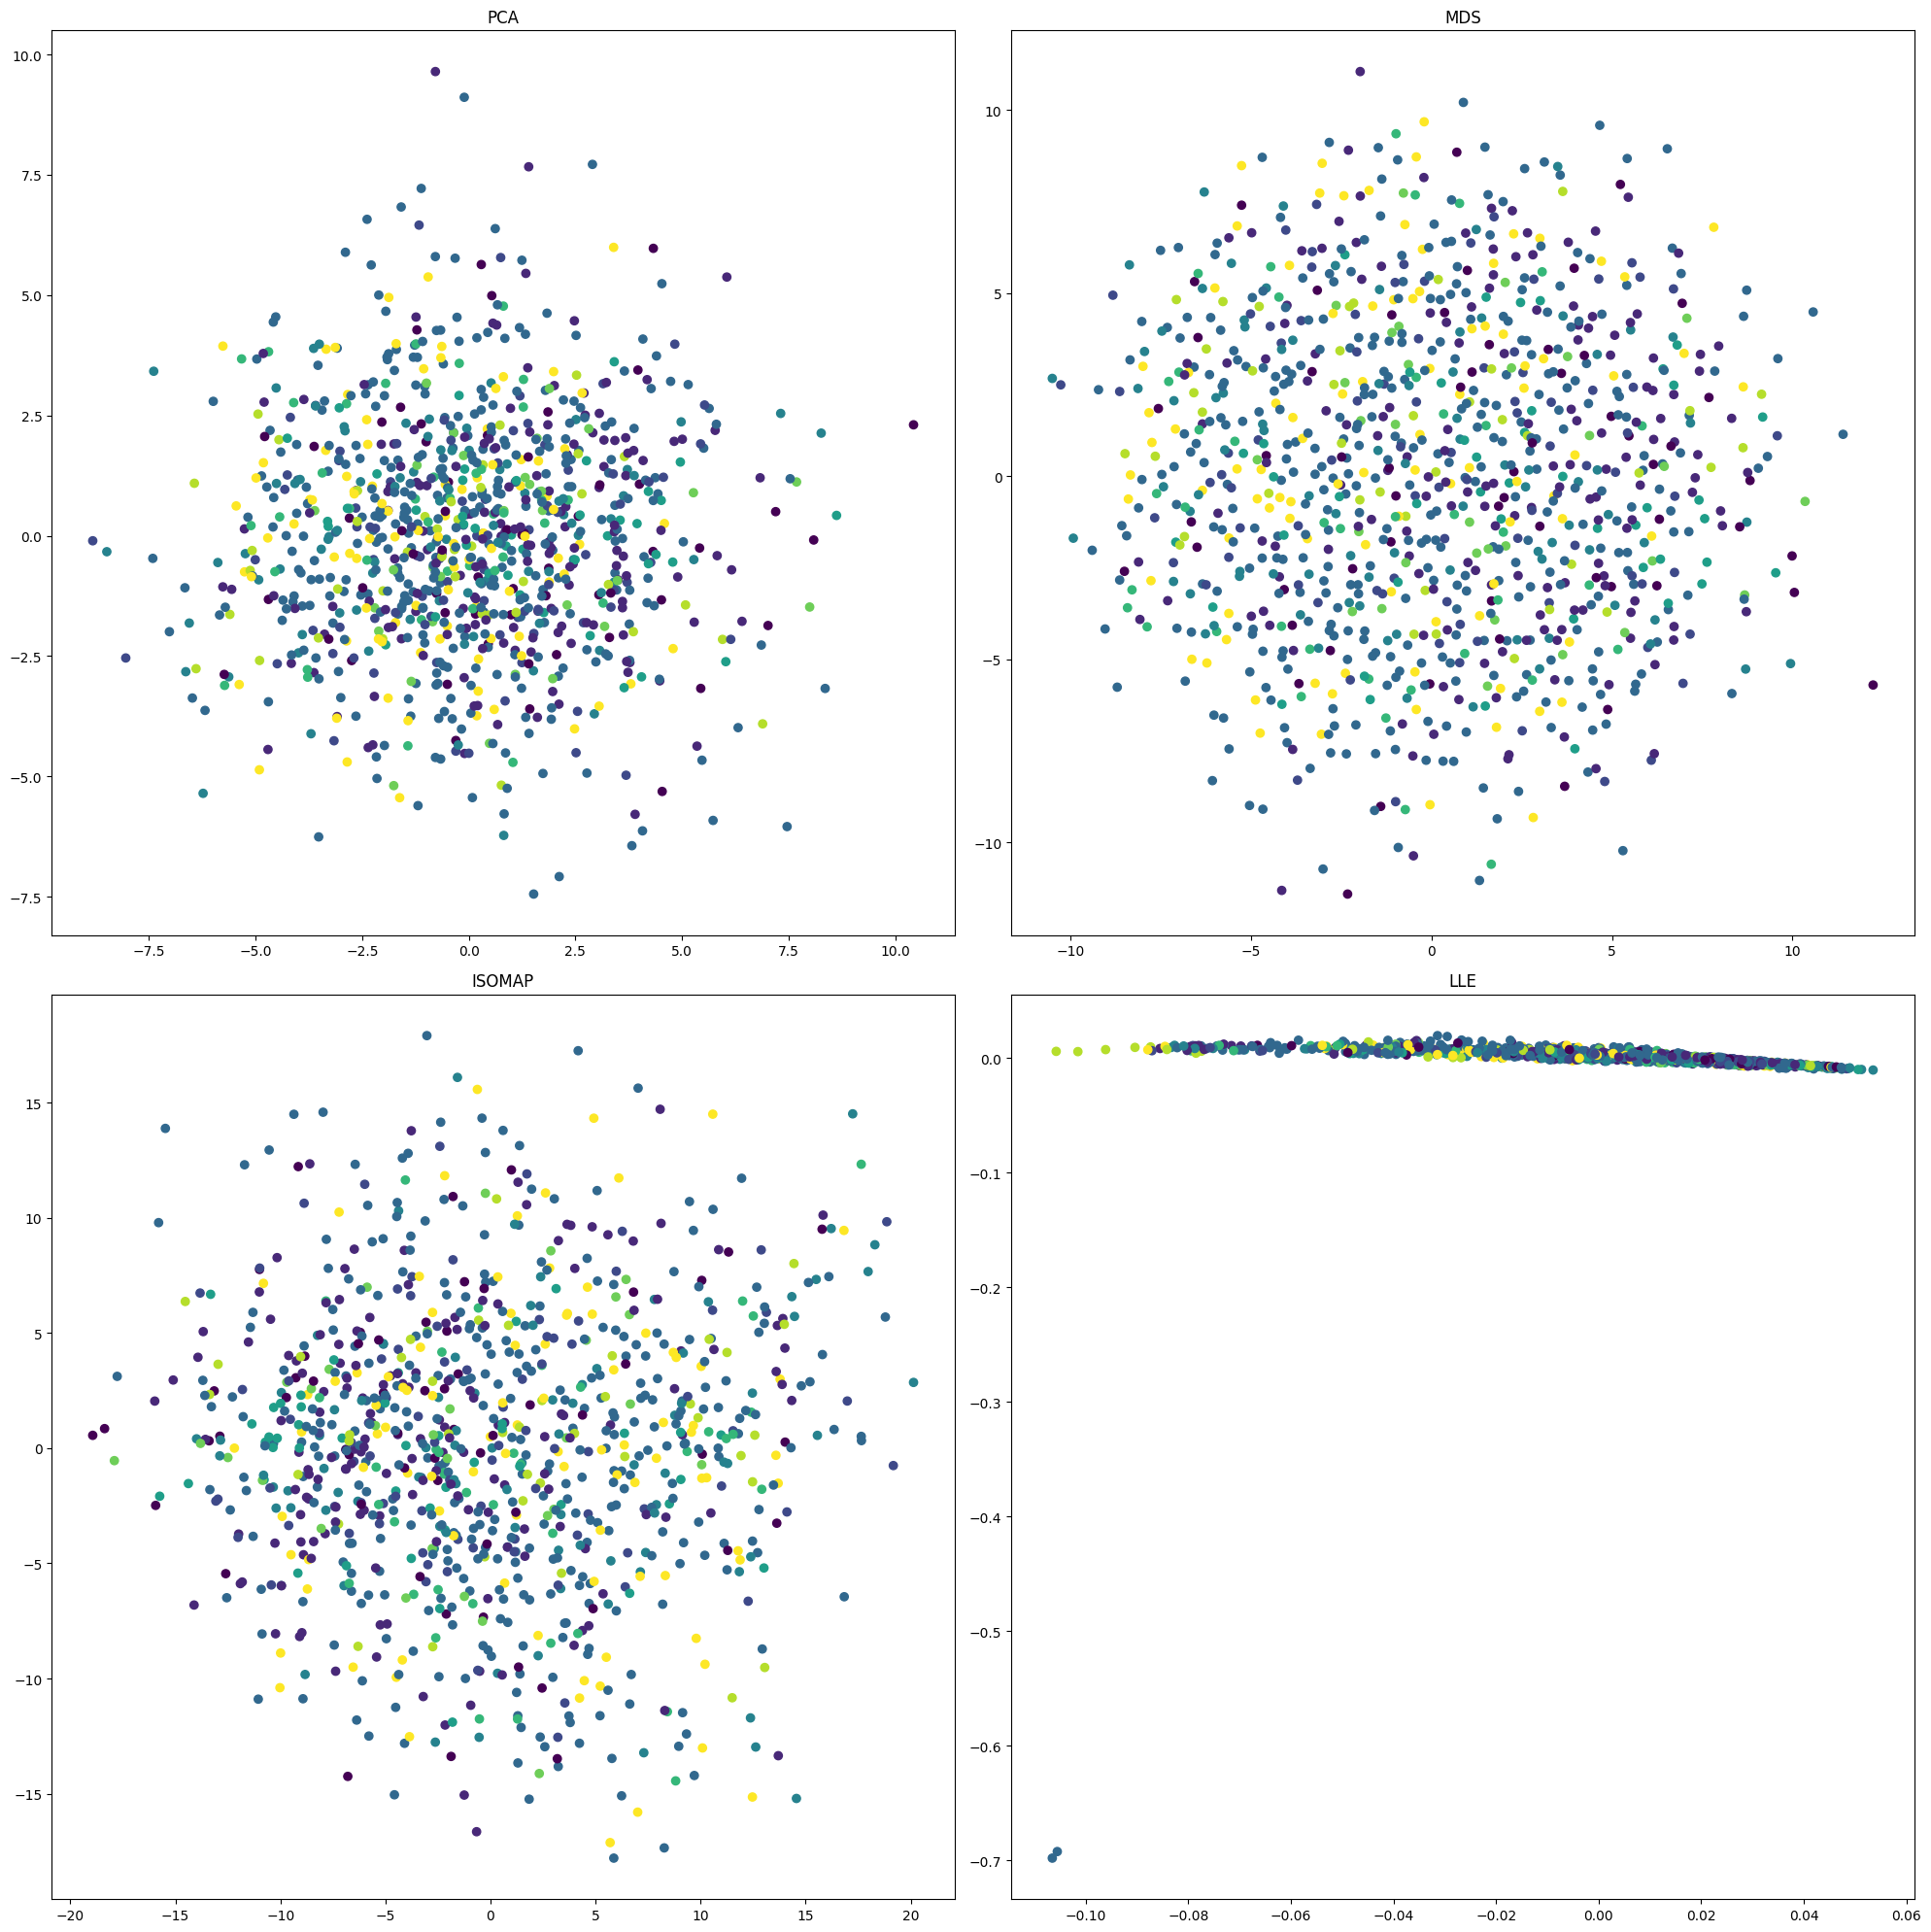

In [143]:
fig, ((axPCA, axMDS), (axISOMAP, axLLE)) = plt.subplots(2,2, figsize=(20, 20))

for axis, reduced in [(axPCA, PCA_REDUCED), (axMDS, MDS_REDUCED), (axISOMAP, ISOMAP_REDUCED), (axLLE, LLE_REDUCED)]:
    axis.scatter(reduced[0][:,0], reduced[0][:,1], c=y_train, cmap='viridis')
    axis.set_title(f"{reduced[2]}")

plt.tight_layout()
plt.show()

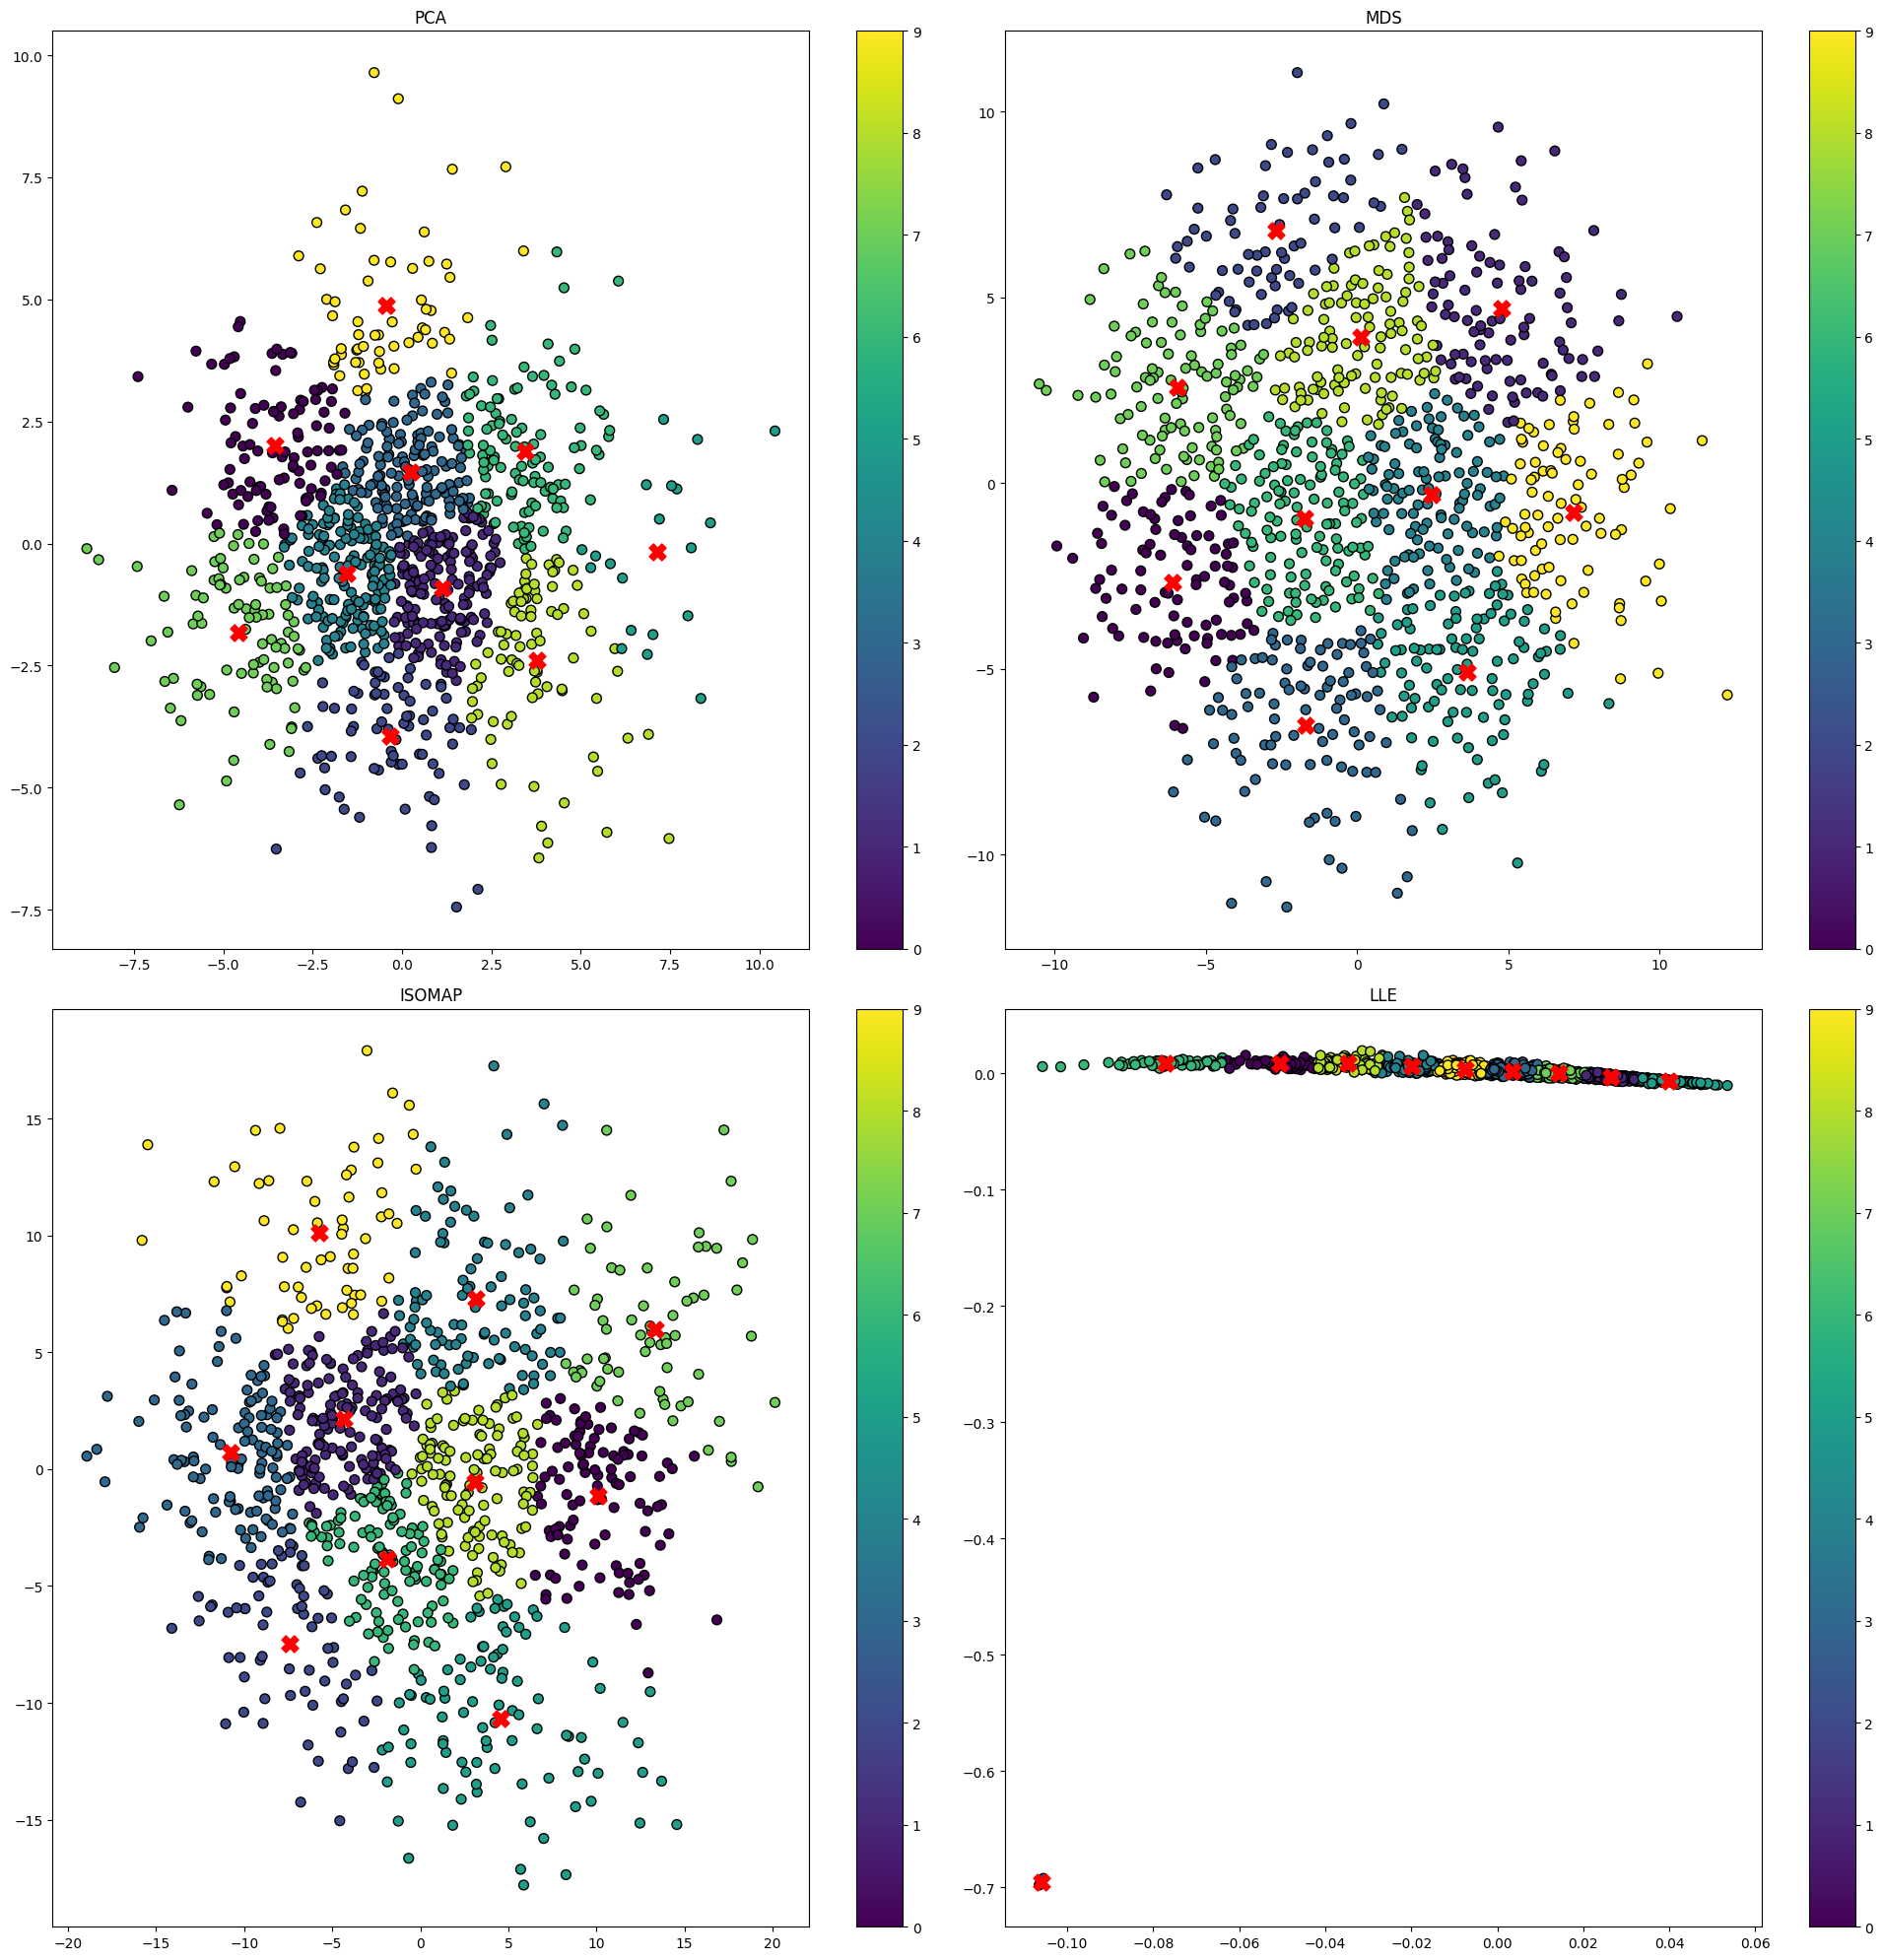

Silhoutte score:
	- PCA       : 0.3331048786640167
	- MDS       : 0.32212110978484676
	- ISOMAP    : 0.32232147455215454
	- LLE       : 0.4492378731502138



In [144]:
fig, ((axPCA, axMDS), (axISOMAP, axLLE)) = plt.subplots(2,2, figsize=(20,20))
metrics_str = "Silhouette score:\n"

for axis , reduced, clusters in [(axPCA, PCA_REDUCED, PCA_CLUSTERS), (axMDS, MDS_REDUCED, MDS_CLUSTERS), (axISOMAP, ISOMAP_REDUCED, ISOMAP_CLUSTERS), (axLLE, LLE_REDUCED, LLE_CLUSTERS)]:
    scatter = axis.scatter(reduced[0][:,0], reduced[0][:,1], c=clusters[0], cmap='viridis', edgecolors='k', s=50)
    axis.scatter(clusters[1][:,0], clusters[1][:,1], c='red', s=150, marker='X', label='Centers')
    plt.colorbar(scatter)
    axis.set_title(reduced[2])
    metrics_str += f"\t- {reduced[2]:<10}: {silhouette_score(reduced[0], clusters[0])}\n"

plt.tight_layout()
plt.show()

print(metrics_str)

Based on the clustering visualization:

- **MDS** seems to offer the best balance between cohesion and separation. It provides clear cluster boundaries and well-centered centroids, which is ideal for interpreting and utilizing the clustering results.
- **ISOMAP** also performs well, particularly if the data's manifold structure is complex. It shows good cluster separation and might be more informative depending on the specific nature of the underlying data relationships.
- **PCA**, while generally effective, seems to have more overlap among clusters, making it slightly less preferable for this specific task based on visual inspection alone.
- **LLE** appears to be the least suitable for this dataset as represented in the plot. The extreme compression into almost a single dimension might miss significant structures or relationships in the data.

Based on the silhouette score:

- **PCA**: 0.3331

    This is a moderate score, suggesting decent separation and cohesion within clusters, though there is room for improvement. It aligns somewhat with the visual observation where PCA showed some overlap among clusters.
- **MDS**: 0.3221

    Slightly lower than PCA, indicating that while visually clusters might appear more separated, the actual data points within clusters might not be as tightly grouped, or the differences between clusters are not as pronounced.
- **ISOMAP**: 0.3223

    Virtually identical to MDS, indicating similar clustering quality. This suggests that, despite having visibly clear separations in some areas, overall cluster cohesion might not be strong, or the clusters are not as distinct when considering the dataset's global structure.
- **LLE**: 0.4492

    Surprisingly, this is the highest score, indicating the best separation and cohesion among clusters according to this metric. This contrasts sharply with the visual analysis where LLE appeared to perform poorly, overly compressing the data which seemed to lose meaningful separation at a higher level.

## Conclusion
Although **LLE** performed better in the *Silhouette Score*, visually seems to have lost a lot of meaningful information in other metrics. For this reason, we consider that would not be useful for our model training.

**PCA** algorithm performed decently in both *Silhouette Score* and visual analysis, but shows a heavier overlapping of data points and concentration among clusters than other algorithms. **PCA** remains a good option in this case due to its balance between effective cluster separation and computational efficiency. However, we have decided to utilize other metrics as they have demonstrated better results.